In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = '../data_raw/'
file_list = os.listdir(file_path)
output_path = '../comparing_categories/data/california_top_five_trees.csv'

In [5]:
df_append = pd.DataFrame()
#append all files together
for file in file_list:
            df_temp = pd.read_csv(file_path  + file, on_bad_lines='skip')
            df_temp['file_name'] = file.split('_')[0]
            df_append = df_append.append(df_temp, ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_76472\1968417506.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_76472\1968417506.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_76472\1968417506.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_76472\1968417506.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.app

In [6]:
states = list(df_append['state'].unique())
for state in states:
    print(state)
    cities = list(df_append[df_append['state'] == state]['file_name'].unique())
    print(cities)
    print()

New Mexico
['Albuquerque']

nan
[]

California
['Anaheim', 'Fresno', 'GardenGrove', 'HuntingtonBeach', 'Irvine', 'Oakland', 'Ontario', 'RanchoCucamonga', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Stockton']

Texas
['Arlington', 'Austin', 'Dallas', 'Houston', 'Plano']

Georgia
['Atlanta']

Colorado
['AuroraCO', 'ColoradoSprings', 'Denver']

Maryland
['Baltimore']

Massachusetts
['Boston', 'Worcester']

New York
['Buffalo', 'Rochester']

Florida
['CapeCoral', 'Miami', 'Orlando', 'Tampa']

Ohio
['Columbus']

Iowa
['DesMoines']

Michigan
['Detroit', 'GrandRapids']

North Carolina
['Durham', 'Greensboro']

Hawaii
['Honolulu']

Indiana
['Indianapolis']

New Jersey
['Jerseycity']

Tennessee
['Knoxville', 'Nashville']

Nevada
['LasVegas']

Kentucky
['Louisville']

Wisconsin
['Madison', 'Milwaukee']

Minnesota
['Minneapolis']

Louisiana
['NewOrleans']

Oklahoma
['OklahomaCity']

Kansas
['OverlandPark']

Arizona
['Phoenix']

Pennsylvania
['Pittsburgh']

Oregon
['Portland

In [7]:
state_cities = ['Anaheim', 'Fresno', 'GardenGrove', 'HuntingtonBeach', 'Irvine', 'LosAngeles', 'Oakland', 'Ontario', 'RanchoCucamonga', 'Sacramento', 'SanDiego', 'SanFrancisco', 'SanJose', 'SantaRosa', 'Stockton']

In [8]:
number = []
for city in state_cities:
    print(city)
    print(len(df_append[df_append['file_name'] == city]))
    number.append(len(df_append[df_append['file_name'] == city]))

Anaheim
79651
Fresno
6980
GardenGrove
17522
HuntingtonBeach
55828
Irvine
58364
LosAngeles
0
Oakland
38613
Ontario
58577
RanchoCucamonga
82947
Sacramento
87191
SanDiego
212304
SanFrancisco
188462
SanJose
347669
SantaRosa
3016
Stockton
98300


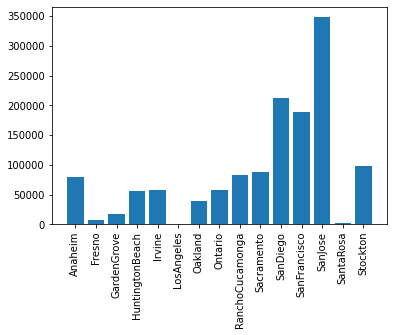

In [9]:
plt.bar(state_cities, height = number)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
chosen_cities = ['Anaheim','RanchoCucamonga','Sacramento','Irvine','Ontario']

In [11]:
df = df_append[df_append['file_name'].isin(chosen_cities)]

In [12]:
list_spec = []
list_num = []
for i, city in enumerate(chosen_cities):
    list_spec.append(list(df_append[df_append['file_name']== city].groupby("common_name").count().sort_values(by='scientific_name', ascending=False)['scientific_name'].head(20).index))
    list_num.append(list(df_append[df_append['file_name']== city].groupby("common_name").count().sort_values(by='scientific_name', ascending=False)['scientific_name'].head(20)/len(df_append[df_append['file_name']== city])))

In [13]:
dict_trees = {}
for i in range(len(list_spec)):
    for j in range(20):
        if list_spec[i][j] in dict_trees:
            dict_trees[list_spec[i][j]] += list_num[i][j]
        else:
            dict_trees[list_spec[i][j]] = list_num[i][j]
            

In [14]:
d = sorted(dict_trees.items(), key=lambda x:x[1])

In [15]:
d[::-1][:5]

[('Crape myrtle', 0.2755930761570826),
 ('London planetree', 0.18231504848710645),
 ('Canary island pine', 0.16398377158230648),
 ('Chinese pistache', 0.12833825333035492),
 ('Camphor tree', 0.12164654935211153)]

In [16]:
chosen_trees = ['Crape myrtle','London planetree','Canary island pine','Chinese pistache','Camphor tree']

In [17]:
data_for_vis_cit_comp = [[],[],[],[],[]]
for i in range(5):
    data_for_vis_cit_comp[i].append(chosen_cities[i])
    data_for_loop = df[df['file_name'] == chosen_cities[i]]
    total_trees = len(data_for_loop)
    for tree in chosen_trees:
        data_for_vis_cit_comp[i].append(len(data_for_loop[data_for_loop['common_name'] == tree]))
    data_for_vis_cit_comp[i].append(total_trees - sum(data_for_vis_cit_comp[i][1:]))


In [18]:
df_vis = pd.DataFrame(data_for_vis_cit_comp, columns = ['City'] + chosen_trees + ['Other'])

In [19]:
df_vis.set_index('City')

,Crape myrtle,London planetree,Canary island pine,Chinese pistache,Camphor tree,Other
City,,,,,,
Anaheim,3320,0,2317,1123,2567,70324
RanchoCucamonga,12877,0,0,3217,0,66853
Sacramento,0,14111,0,4580,773,67727
Irvine,0,1195,4578,0,1333,51258
Ontario,4630,0,3307,1343,3900,45397


In [20]:
df_vis.set_index('City').to_csv(output_path)